## Will Holt & Michael Wise
## DATA 477 Capping
## Chapter 14 Project
## Spring 2023

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

In [19]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
#Ignore warnings or change drop and relearn function
#import warnings
#warnings.filterwarnings("ignore")

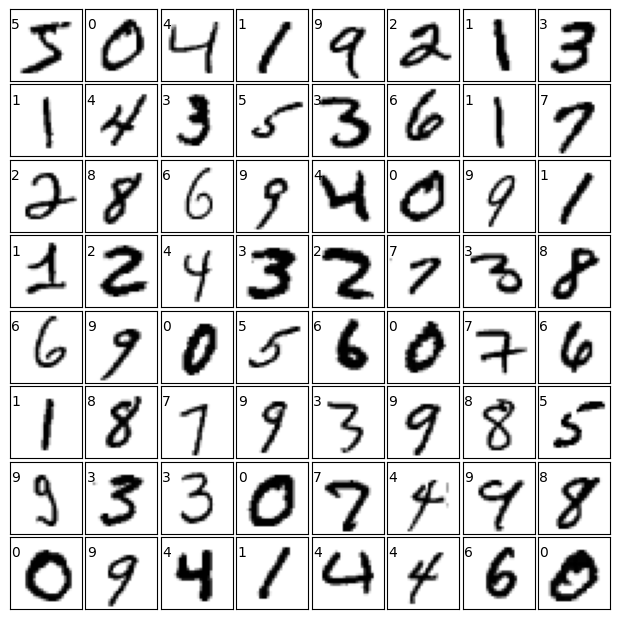

In [21]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(train_images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(train_labels[i]))

In [ ]:
'''
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  51 238 253 253 190 114 253 228  47  79 255 168   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  48 238 252 252 179  12  75 121  21   0   0 253 243  50   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  38 165 253 233 208  84   0   0   0   0   0   0 253 252 165   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7 178 252 240  71  19  28   0   0   0   0   0   0 253 252 195   0   0   0   0   0]
 [  0   0   0   0   0   0   0  57 252 252  63   0   0   0   0   0   0   0   0   0 253 252 195   0   0   0   0   0]
 [  0   0   0   0   0   0   0 198 253 190   0   0   0   0   0   0   0   0   0   0 255 253 196   0   0   0   0   0]
 [  0   0   0   0   0   0  76 246 252 112   0   0   0   0   0   0   0   0   0   0 253 252 148   0   0   0   0   0]
 [  0   0   0   0   0   0  85 252 230  25   0   0   0   0   0   0   0   0   7 135 253 186  12   0   0   0   0   0]
 [  0   0   0   0   0   0  85 252 223   0   0   0   0   0   0   0   0   7 131 252 225  71   0   0   0   0   0   0]
 [  0   0   0   0   0   0  85 252 145   0   0   0   0   0   0   0  48 165 252 173   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  86 253 225   0   0   0   0   0   0 114 238 253 162   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  85 252 249 146  48  29  85 178 225 253 223 167  56   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  85 252 252 252 229 215 252 252 252 196 130   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  28 199 252 252 253 252 252 233 145   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  25 128 252 253 252 141  37   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
 '''

In [22]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [23]:
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation='softmax')
])

In [24]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels),callbacks=[early_stop]);



Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3271 - accuracy: 0.9031 - val_loss: 0.1380 - val_accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1722 - accuracy: 0.9520 - val_loss: 0.1200 - val_accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1416 - accuracy: 0.9611 - val_loss: 0.1137 - val_accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1269 - accuracy: 0.9657 - val_loss: 0.1100 - val_accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1179 - accuracy: 0.9686 - val_loss: 0.1057 - val_accuracy: 0.9750
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1128 - accuracy: 0.9704 - val_loss: 0.0994 - val_accuracy: 0.9752
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1090 - accuracy: 0.9722 - val_loss: 0.0959 - val_accuracy:

## LIME Analysis

Felzenszwalb number of segments: 4


Text(0.5, 1.0, "Felzenszwalbs's method")

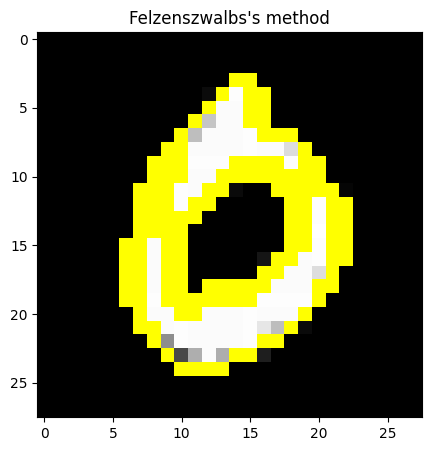

In [25]:
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries

from skimage.util import img_as_float

img = img_as_float(test_images[3,])

segments_fz = felzenszwalb(img, scale=1, sigma=0.5, min_size=10)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')

fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)

ax.imshow(mark_boundaries(img, segments_fz))
ax.set_title("Felzenszwalbs's method")

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=4d0aa88fdf0d1d7b18c524a1e47cd25e2ec29c3543f004737f4d6a689e9c83d9
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [26]:
import skimage
from skimage.color import gray2rgb, rgb2gray

def make_prediction(color_img):
    gray_img = rgb2gray(color_img).reshape(-1,28,28,1)
    preds = model.predict(gray_img)
    return preds

In [27]:
colored_image = gray2rgb(test_images[1,].squeeze())

preds = make_prediction(colored_image)

preds.shape

1/1 [==============================] - 0s 98ms/step


(1, 10)

In [28]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [29]:
from skimage.segmentation import felzenszwalb, flood_fill, flood

idx=3

print("Actual Target Value     : {}".format(test_labels[idx]))
pred = model.predict(test_images[idx:idx+1]).argmax(axis=1)[0]
print("Predicted Target Values : {}".format(pred))

explanation = explainer.explain_instance(test_images[idx].squeeze(), make_prediction, segmentation_fn=felzenszwalb, random_seed=123)


explanation

Actual Target Value     : 0
1/1 [==============================] - 0s 73ms/step
Predicted Target Values : 0


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step


In [30]:
img, mask = explanation.get_image_and_mask(test_labels[idx], positive_only=True, hide_rest=True)

img.shape, mask.shape

((28, 28, 3), (28, 28))

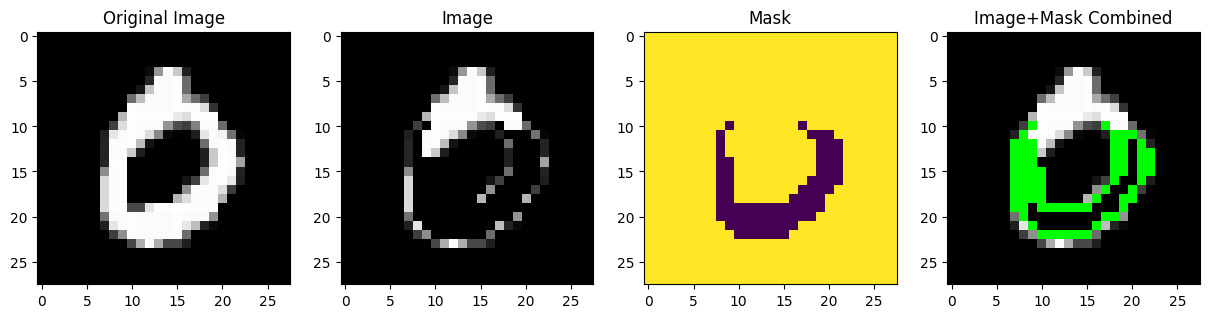

In [ ]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

def plot_comparison(main_image, img, mask):
    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(141)
    ax.imshow(main_image, cmap="gray");
    ax.set_title("Original Image")
    ax = fig.add_subplot(142)
    ax.imshow(img);
    ax.set_title("Image")
    ax = fig.add_subplot(143)
    ax.imshow(mask);
    ax.set_title("Mask")
    ax = fig.add_subplot(144)
    ax.imshow(mark_boundaries(img, mask, color=(0,1,0)));
    ax.set_title("Image+Mask Combined");

plot_comparison(test_images[idx], img, mask)

##From Lime Github

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray, label2rgb # since the code wants color images

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# make each image color so lime_image works correctly
X_vec = np.stack([gray2rgb(iimg) for iimg in mnist.data.values.reshape((-1, 28, 28))],0).astype(np.uint8)
y_vec = mnist.target.astype(np.uint8)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Text(0.5, 1.0, 'Digit: 5')

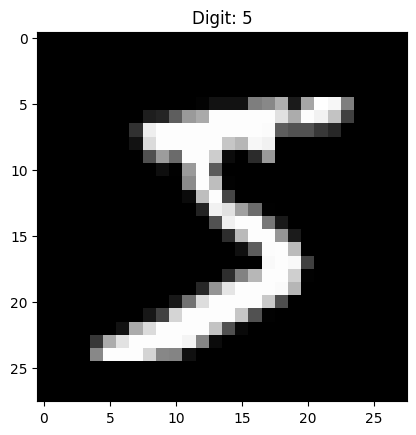

In [6]:
%matplotlib inline
fig, ax1 = plt.subplots(1,1)
ax1.imshow(X_vec[0], interpolation = 'none')
ax1.set_title('Digit: {}'.format(y_vec[0]))

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer

class PipeStep(object):
    """
    Wrapper for turning functions into pipeline transforms (no-fitting)
    """
    def __init__(self, step_func):
        self._step_func=step_func
    def fit(self,*args):
        return self
    def transform(self,X):
        return self._step_func(X)


makegray_step = PipeStep(lambda img_list: [rgb2gray(img) for img in img_list])
flatten_step = PipeStep(lambda img_list: [img.ravel() for img in img_list])

simple_rf_pipeline = Pipeline([
    ('Make Gray', makegray_step),
    ('Flatten Image', flatten_step),
    #('Normalize', Normalizer()),
    #('PCA', PCA(16)),
    ('RF', RandomForestClassifier())
                              ])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec,
                                                    train_size=0.55)

In [9]:
simple_rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Make Gray', <__main__.PipeStep object at 0x7fcb456f5e20>),
                ('Flatten Image', <__main__.PipeStep object at 0x7fcb456f5fd0>),
                ('RF', RandomForestClassifier())])

In [4]:
#!pip install lime
import lime

In [10]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer = lime_image.LimeImageExplainer(verbose = False)
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

In [91]:
%%time
idx = 14
explanation = explainer.explain_instance(X_test[idx], 
                                         classifier_fn = simple_rf_pipeline.predict_proba, 
                                         top_labels=10, hide_color=0, num_samples=10000, segmentation_fn=segmenter)

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 14 s, sys: 249 ms, total: 14.2 s
Wall time: 14.6 s


In [90]:
Y_test = y_test.reset_index()['class']
Y_test[10:20]

10    8
11    7
12    3
13    8
14    6
15    0
16    1
17    9
18    2
19    9
Name: class, dtype: uint8

Text(0.5, 1.0, 'Positive/Negative Regions for 6')

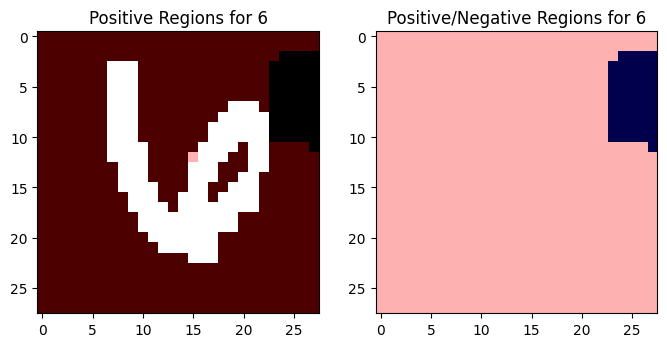

In [92]:
temp, mask = explanation.get_image_and_mask(Y_test[idx], positive_only=True, hide_rest=True, num_features=10, min_weight = 0.01)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(Y_test[idx]))
temp, mask = explanation.get_image_and_mask(Y_test[idx], positive_only=False, num_features=10, hide_rest=False, min_weight = 0.01)
ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(Y_test[idx]))

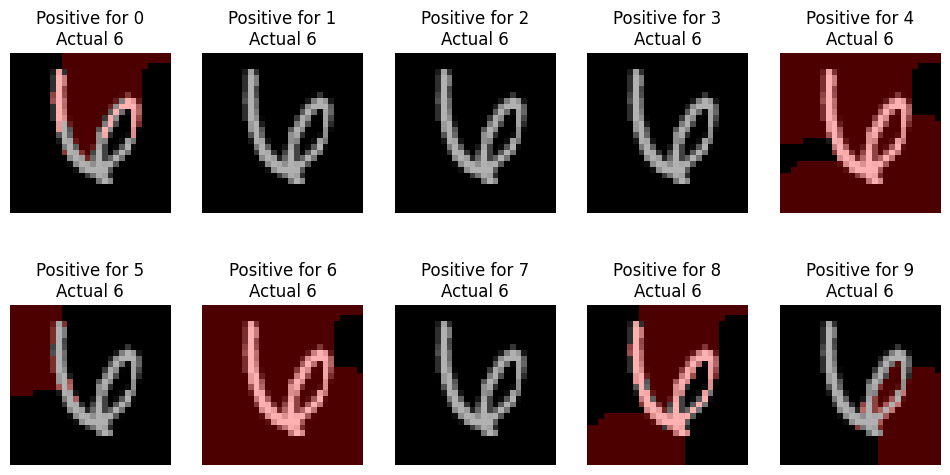

In [93]:
# now show them for each class
fig, m_axs = plt.subplots(2,5, figsize = (12,6))
for i, c_ax in enumerate(m_axs.flatten()):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=1000, hide_rest=False, min_weight = 0.01 )
    c_ax.imshow(label2rgb(mask,X_test[idx], bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nActual {}'.format(i, Y_test[idx]))
    c_ax.axis('off')

Looking at when it predicted the wrong number

In [96]:
pipe_pred_test = simple_rf_pipeline.predict(X_test)
wrong_idx = np.random.choice(np.where(pipe_pred_test!=Y_test)[0])
print('Using #{} where the label was {} and the pipeline predicted {}'.format(wrong_idx, Y_test[wrong_idx], pipe_pred_test[wrong_idx]))

Using #3363 where the label was 5 and the pipeline predicted 0


In [97]:
%%time
explanation = explainer.explain_instance(X_test[wrong_idx], 
                                         classifier_fn = simple_rf_pipeline.predict_proba, 
                                         top_labels=10, hide_color=0, num_samples=10000, segmentation_fn=segmenter)

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 13.6 s, sys: 281 ms, total: 13.9 s
Wall time: 14.2 s


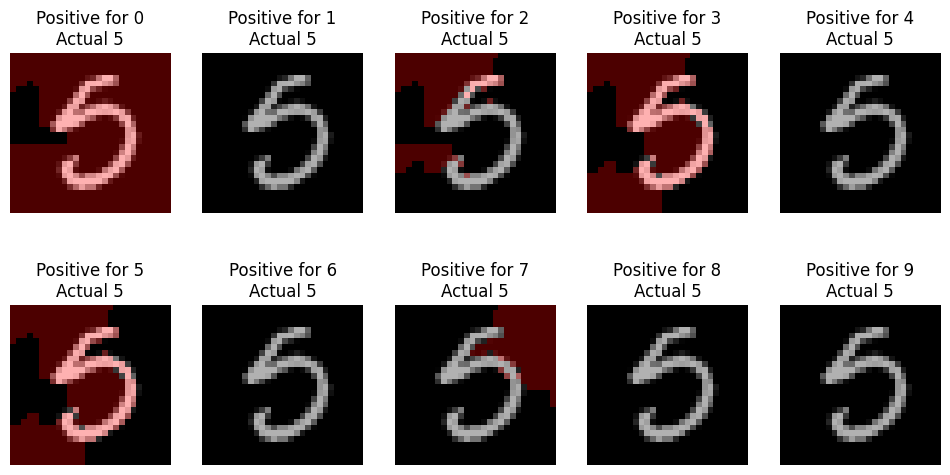

In [99]:
# now show them for each class
fig, m_axs = plt.subplots(2,5, figsize = (12,6))
for i, c_ax in enumerate(m_axs.flatten()):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01 )
    c_ax.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nActual {}'.format(i, Y_test[wrong_idx]))
    c_ax.axis('off')